# ECON 220C Part II Homework 4

## Productivity Shocks in the Three Equation Model

In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
# Set parameters
beta = 0.99
sigma = 1
kappa = 0.1
rho_a = 0.8
phi_pi = 1.5
gamma = 1
varphi = 1 # Why

In [120]:
# Define the number of time periods
T = 20

# Initialize arrays for the variables
a_t = np.zeros(T+1)
y_t = np.zeros(T)
pi_t = np.zeros(T)
y_flex_t = np.zeros(T)
y_gap_t = np.zeros(T)
i_t = np.zeros(T)
er_t1 = np.zeros(T)
n_t = np.zeros(T)

In [121]:
# Compute the eta coefficients
eta_pia = kappa * (1-rho_a) * (1+varphi) / (gamma+varphi) / (kappa*sigma*(rho_a-phi_pi) - (1-rho_a)*(1-beta*rho_a))
eta_ya = sigma * (rho_a-phi_pi) / (1-rho_a) * eta_pia
eta_ia = phi_pi * eta_pia
# eta_pia, eta_ya, eta_ia

In [125]:
# Impose a one-unit shock to a_t at t=0
a_t[0] = 1

# Calculate the values over time
for t in range(T):
    y_t[t] = eta_ya * a_t[t]
    pi_t[t] = eta_pia * a_t[t]
    y_flex_t[t] = (1 + varphi) / (gamma + varphi) * a_t[t]
    y_gap_t[t] = y_t[t] - y_flex_t[t]
    i_t[t] = eta_ia * a_t[t]
    er_t1[t] = (eta_ia - eta_pia * rho_a) * rho_a * a_t[t]
    n_t[t] = y_t[t] - a_t[t]
    a_t[t+1] = rho_a * a_t[t]

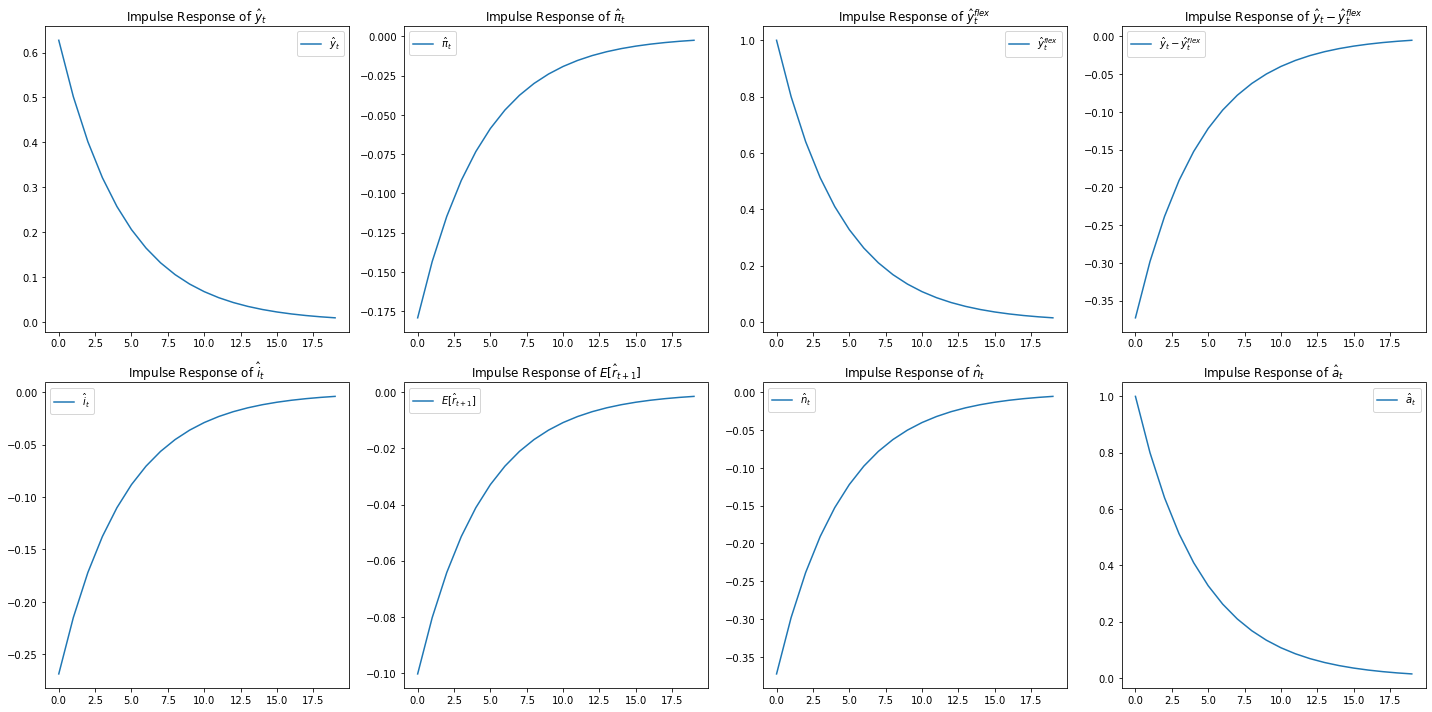

In [139]:
# Plot IRFs
time = np.arange(T)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes[0, 0].plot(time, y_t, label='$\hat{y}_t$')
axes[0, 0].set_title('Impulse Response of $\hat{y}_t$')
axes[0, 0].legend()

axes[0, 1].plot(time, pi_t, label='$\hat{\pi}_t$')
axes[0, 1].set_title('Impulse Response of $\hat{\pi}_t$')
axes[0, 1].legend()

axes[0, 2].plot(time, y_flex_t, label='$\hat{y}_t^{flex}$')
axes[0, 2].set_title('Impulse Response of $\hat{y}_t^{flex}$')
axes[0, 2].legend()

axes[0, 3].plot(time, y_gap_t, label='$\hat{y}_t - \hat{y}_t^{flex}$')
axes[0, 3].set_title('Impulse Response of $\hat{y}_t - \hat{y}_t^{flex}$')
axes[0, 3].legend()

axes[1, 0].plot(time, i_t, label='$\hat{i}_t$')
axes[1, 0].set_title('Impulse Response of $\hat{i}_t$')
axes[1, 0].legend()

axes[1, 1].plot(time, er_t1, label='$E[\hat{r}_{t+1}]$')
axes[1, 1].set_title('Impulse Response of $E[\hat{r}_{t+1}]$')
axes[1, 1].legend()

axes[1, 2].plot(time, n_t, label='$\hat{n}_t$')
axes[1, 2].set_title('Impulse Response of $\hat{n}_t$')
axes[1, 2].legend()

axes[1, 3].plot(time, a_t[0:-1], label='$\hat{a}_t$')
axes[1, 3].set_title('Impulse Response of $\hat{a}_t$')
axes[1, 3].legend()

plt.tight_layout()
plt.savefig('figs/q1_IRFs.png', dpi=300)

## Non-linear NK Model in Jupyter

In [135]:
from sequence_jacobian import simple, create_model

In [138]:
# Set parameters
beta = 0.99
gamma = 1
varphi = 1
chi = 1
epsilon = 10
rho_a = 0.8
phi_pi = 1.5
phi_y = 0

theta = np.array([0.0001, 0.25, 0.5, 0.75, 0.9999])

In [ ]:
from sequence_jacobian import simple, create_model

@simple
def nkpc(pi, yflex, beta, kappa):
    y = yflex + 1 / kappa * (pi - beta * pi(+1))
    return y

@simple
def central_bank(pi, v, phi_pi):
    i = phi_pi * pi + v
    return i

@simple
def mkt_clearing(y, i, pi, gamma):
    euler = gamma * y + i - pi(+1) - gamma * y(+1)
    r = i - pi(+1)
    c = y
    return euler, r, c